In [1]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.linear_model import LogisticRegression
import scipy

import matplotlib.pyplot as plt
%matplotlib inline

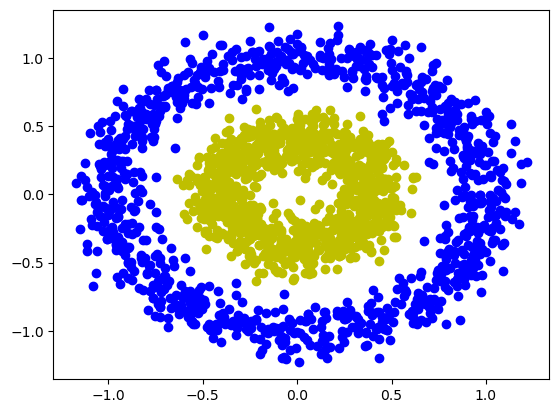

In [2]:
X, y = make_circles(2000, noise = .1, random_state = 123, factor = .4)
#plt.scatter(X[:,0], X[:,1], c = y)
plt.plot(X[y==0,0], X[y==0,1], "bo")
plt.plot(X[y==1,0], X[y==1,1], "yo")

In [3]:
# Tarea, modificar esta parte con la implementación del Kernel Perceptron
X_new = np.c_[(X,X[:,0]**2,X[:,1]**2)]
model = LogisticRegression()
model.fit(X_new,y)

LogisticRegression()

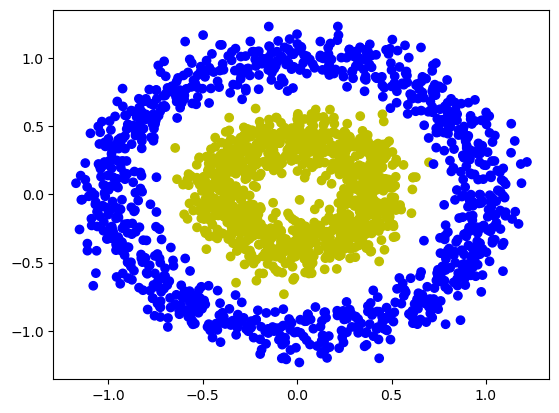

In [4]:
import matplotlib.colors as mcolors

y_hat = model.predict(X_new)
plt.scatter(X_new[:,0], X_new[:,1], c = y_hat, cmap=mcolors.ListedColormap(['b', 'y']))
#plt.plot(X_new[y_hat==0,0], X_new[y_hat==0,1], "bo")
#plt.plot(X_new[y_hat==1,0], X_new[y_hat==1,1], "yo")

In [6]:
def plot_contour(X1_train, X2_train, clf):
    plt.plot(X1_train[:,0], X1_train[:,1], "bo")
    plt.plot(X2_train[:,0], X2_train[:,1], "yo")

    X1, X2 = np.meshgrid(np.linspace(-1.3,1.3,50), np.linspace(-1.3,1.3,50))
    X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
    Z = clf.decision_function(np.c_[(X,X[:,0]**2,X[:,1]**2)]).reshape(X1.shape)

    plt.contour(X1, X2, Z, [0], colors='r', linewidths=3)

    plt.show()

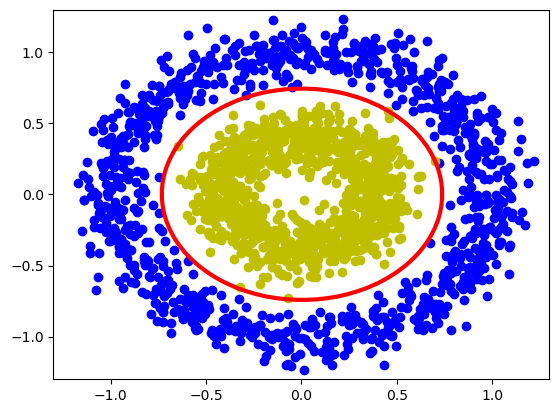

In [8]:
plot_contour(X_new[y_hat==0], X_new[y_hat==1],model)

In [7]:
X1, X2 = np.meshgrid(np.linspace(-1.3,1.3,50), np.linspace(-1.3,1.3,50))
X2

array([[-1.3       , -1.3       , -1.3       , ..., -1.3       ,
        -1.3       , -1.3       ],
       [-1.24693878, -1.24693878, -1.24693878, ..., -1.24693878,
        -1.24693878, -1.24693878],
       [-1.19387755, -1.19387755, -1.19387755, ..., -1.19387755,
        -1.19387755, -1.19387755],
       ...,
       [ 1.19387755,  1.19387755,  1.19387755, ...,  1.19387755,
         1.19387755,  1.19387755],
       [ 1.24693878,  1.24693878,  1.24693878, ...,  1.24693878,
         1.24693878,  1.24693878],
       [ 1.3       ,  1.3       ,  1.3       , ...,  1.3       ,
         1.3       ,  1.3       ]])

In [6]:
X1

array([[-1.3       , -1.24693878, -1.19387755, ...,  1.19387755,
         1.24693878,  1.3       ],
       [-1.3       , -1.24693878, -1.19387755, ...,  1.19387755,
         1.24693878,  1.3       ],
       [-1.3       , -1.24693878, -1.19387755, ...,  1.19387755,
         1.24693878,  1.3       ],
       ...,
       [-1.3       , -1.24693878, -1.19387755, ...,  1.19387755,
         1.24693878,  1.3       ],
       [-1.3       , -1.24693878, -1.19387755, ...,  1.19387755,
         1.24693878,  1.3       ],
       [-1.3       , -1.24693878, -1.19387755, ...,  1.19387755,
         1.24693878,  1.3       ]])

In [7]:
np.ravel(X1)[:52]

array([-1.3       , -1.24693878, -1.19387755, -1.14081633, -1.0877551 ,
       -1.03469388, -0.98163265, -0.92857143, -0.8755102 , -0.82244898,
       -0.76938776, -0.71632653, -0.66326531, -0.61020408, -0.55714286,
       -0.50408163, -0.45102041, -0.39795918, -0.34489796, -0.29183673,
       -0.23877551, -0.18571429, -0.13265306, -0.07959184, -0.02653061,
        0.02653061,  0.07959184,  0.13265306,  0.18571429,  0.23877551,
        0.29183673,  0.34489796,  0.39795918,  0.45102041,  0.50408163,
        0.55714286,  0.61020408,  0.66326531,  0.71632653,  0.76938776,
        0.82244898,  0.8755102 ,  0.92857143,  0.98163265,  1.03469388,
        1.0877551 ,  1.14081633,  1.19387755,  1.24693878,  1.3       ,
       -1.3       , -1.24693878])

In [8]:
[x for x in zip(np.ravel(X1))] 

[(-1.3,),
 (-1.2469387755102042,),
 (-1.1938775510204083,),
 (-1.1408163265306124,),
 (-1.0877551020408163,),
 (-1.0346938775510204,),
 (-0.9816326530612245,),
 (-0.9285714285714286,),
 (-0.8755102040816327,),
 (-0.8224489795918367,),
 (-0.7693877551020408,),
 (-0.7163265306122449,),
 (-0.6632653061224489,),
 (-0.610204081632653,),
 (-0.5571428571428572,),
 (-0.5040816326530612,),
 (-0.4510204081632653,),
 (-0.3979591836734694,),
 (-0.3448979591836734,),
 (-0.2918367346938775,),
 (-0.2387755102040816,),
 (-0.18571428571428572,),
 (-0.13265306122448983,),
 (-0.07959183673469372,),
 (-0.026530612244897833,),
 (0.026530612244898055,),
 (0.07959183673469394,),
 (0.13265306122448983,),
 (0.18571428571428572,),
 (0.23877551020408183,),
 (0.2918367346938777,),
 (0.3448979591836736,),
 (0.3979591836734695,),
 (0.4510204081632654,),
 (0.5040816326530613,),
 (0.5571428571428572,),
 (0.6102040816326533,),
 (0.6632653061224492,),
 (0.716326530612245,),
 (0.7693877551020412,),
 (0.8224489795918368,

In [13]:
X_test = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
X_test

array([[-1.3       , -1.3       ],
       [-1.24693878, -1.3       ],
       [-1.19387755, -1.3       ],
       ...,
       [ 1.19387755,  1.3       ],
       [ 1.24693878,  1.3       ],
       [ 1.3       ,  1.3       ]])